In [2]:
# Set working dir to project root",
import os
os.chdir('..')

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

from modules.ibu_utils import *

In [4]:
index_dims = ["season", "event", "race", "sex", "name", "nat"]
by_race_dims = ["season", "event", "sex", "race"]

# ... number of missed shots
df = pd.concat([
  get_misses("Women")[index_dims + ["misses"]],
  get_misses("Men")[index_dims + ["misses"]]  
])
df["runner"] = df["name"] + " (" + df["nat"] + ")" # H. OEBERG (swe), assuming uniquness of name + nationality

df["discipline"] = df["race"].str.split("km ").str[-1] # "Sprint", "Mass Start" etc
df["discipline"] = df["discipline"].replace({"Short Individual": "Individual"})

df["n_shootings"] = 4
df.loc[df["discipline"] == "Sprint", "n_shootings"] = 2
df["n_shots"] = df["n_shootings"] * 5
df["shot_pct"] = (df["n_shots"] - df["misses"]) / df["n_shots"]
df = df.drop_duplicates()
df.head()

season           event                 race    sex             name  \
0  2018-2019  Pokljuka (SLO)  Women 7.5 km Sprint  women       V. VITKOVA   
1  2018-2019  Pokljuka (SLO)  Women 7.5 km Sprint  women       S. DUNKLEE   
2  2018-2019  Pokljuka (SLO)  Women 7.5 km Sprint  women         S. MAEDA   
3  2018-2019  Pokljuka (SLO)  Women 7.5 km Sprint  women      N. HORCHLER   
4  2018-2019  Pokljuka (SLO)  Women 7.5 km Sprint  women  I.L. TANDREVOLD   

   nat  misses                 runner discipline  n_shootings  n_shots  \
0  cze     0.0       V. VITKOVA (cze)     Sprint            2       10   
1  usa     2.0       S. DUNKLEE (usa)     Sprint            2       10   
2  jpn     3.0         S. MAEDA (jpn)     Sprint            2       10   
3  ger     1.0      N. HORCHLER (ger)     Sprint            2       10   
4  nor     2.0  I.L. TANDREVOLD (nor)     Sprint            2       10   

   shot_pct  
0       1.0  
1       0.8  
2       0.7  
3       0.9  
4       0.8

In [5]:
df.groupby(["event", "race"]).size()

event                       race                          
Antholz-Anterselva (ITA)    Men 10 km Sprint                  108
                            Men 12.5 km Pursuit                60
                            Men 15 km Mass Start               30
                            Women 10 km Pursuit                60
                            Women 12.5 km Mass Start           30
                            Women 7.5 km Sprint                97
Canmore (CAN)               Men 15 km Short Individual         98
                            Women 12.5 km Short Individual     93
Hochfilzen (AUT)            Men 10 km Sprint                  110
                            Men 12.5 km Pursuit                60
                            Women 10 km Pursuit                59
                            Women 7.5 km Sprint               102
Nove Mesto (CZE)            Men 10 km Sprint                  107
                            Men 12.5 km Pursuit                60
                 

In [16]:
df[df.runner.str.contains("PONSIL")][[]]

season                     event                  race  sex  \
156   2018-2019  Antholz-Anterselva (ITA)   Men 12.5 km Pursuit  men   
290   2018-2019  Antholz-Anterselva (ITA)      Men 10 km Sprint  men   
454   2018-2019          Nove Mesto (CZE)  Men 15 km Mass Start  men   
492   2018-2019          Nove Mesto (CZE)      Men 10 km Sprint  men   
576   2018-2019          Nove Mesto (CZE)   Men 12.5 km Pursuit  men   
690   2018-2019          Hochfilzen (AUT)   Men 12.5 km Pursuit  men   
721   2018-2019          Ruhpolding (GER)      Men 10 km Sprint  men   
875   2018-2019            Pokljuka (SLO)      Men 10 km Sprint  men   
1006  2018-2019            Pokljuka (SLO)  Men 20 km Individual  men   
1070  2018-2019          Hochfilzen (AUT)      Men 10 km Sprint  men   
1187  2018-2019            Pokljuka (SLO)   Men 12.5 km Pursuit  men   

               name  nat  misses               runner  discipline  \
156   M. PONSILUOMA  swe     NaN  M. PONSILUOMA (swe)     Pursuit   
290   M. PONSILUOMA  swe     1.0  M. PONSILUOMA (swe)      Sprint   
454   M. PONSILUOMA  swe     2.0  M. PONSILUOMA (swe)  Mass Start   
492   M. PONSILUOMA  swe     0.0  M. PONSILUOMA (swe)      Sprint   
576   M. PONSILUOMA  swe     5.0  M. PONSILUOMA (swe)     Pursuit   
690   M. PONSILUOMA  swe     4.0  M. PONSILUOMA (swe)     Pursuit   
721   M. PONSILUOMA  swe     2.0  M. PONSILUOMA (swe)      Sprint   
875   M. PONSILUOMA  swe     2.0  M. PONSILUOMA (swe)      Sprint   
1006  M. PONSILUOMA  swe     1.0  M. PONSILUOMA (swe)  Individual   
1070  M. PONSILUOMA  swe     1.0  M. PONSILUOMA (swe)      Sprint   
1187  M. PONSILUOMA  swe     3.0  M. PONSILUOMA (swe)     Pursuit   

      n_shootings  n_shots  shot_pct  
156             4       20       NaN  
290             2       10      0.90  
454             4       20      0.90  
492             2       10      1.00  
576             4       20      0.75  
690             4       20      0.80  
721             2       10      0.80  
875             2       10      0.80  
1006            4       20      0.95  
1070            2       10      0.90  
1187            4       20      0.85

In [20]:
df[df.misses.notna() & df.runner.str.contains("PONSIL")][["misses", "n_shots"]].sum()

misses      21.0
n_shots    150.0
dtype: float64

In [21]:
by_runner = df[df["misses"].notna()].groupby(["runner"])

runnner_df = pd.concat([
    (1 - (by_runner["misses"].sum() / by_runner["n_shots"].sum() )).rename("shot_pct") * 100,

    #by_runner["shot_pct"].mean().rename("shot_pct") * 100,
    by_runner["name"].count().rename("n_races"),
    by_runner["nat"].first().rename("nat"),
    by_runner["sex"].first().rename("sex"),
    by_runner["name"].first().rename("name"),
], axis=1)

runnner_df["prob_sprint"] = np.power(runnner_df.shot_pct / 100, 10) * 100
runnner_df["prob_distance"] = np.power(runnner_df.shot_pct / 100, 20) * 100
runnner_df["ratio_sprint"] = 1 / (runnner_df["prob_sprint"] / 100)
runnner_df["ratio_distance"] = 1 / (runnner_df["prob_distance"] / 100)

runnner_df.head()


shot_pct  n_races  nat    sex          name  prob_sprint  \
runner                                                                          
A. ANGELIS (gre)    51.250000        7  gre    men    A. ANGELIS     0.125008   
A. BABIKOV (rus)    70.000000        1  rus    men    A. BABIKOV     2.824752   
A. BEGUE (fra)      90.000000        3  fra    men      A. BEGUE    34.867844   
A. BESCOND (fra)    82.068966       18  fra  women    A. BESCOND    13.860841   
A. CHEVALIER (fra)  85.925926       17  fra  women  A. CHEVALIER    21.940282   

                    prob_distance  ratio_sprint  ratio_distance  
runner                                                           
A. ANGELIS (gre)         0.000156    799.947163   639915.464179  
A. BABIKOV (rus)         0.079792     35.401332     1253.254289  
A. BEGUE (fra)          12.157665      2.867972        8.225263  
A. BESCOND (fra)         1.921229      7.214569       52.050010  
A. CHEVALIER (fra)       4.813760      4.557827       20.773783

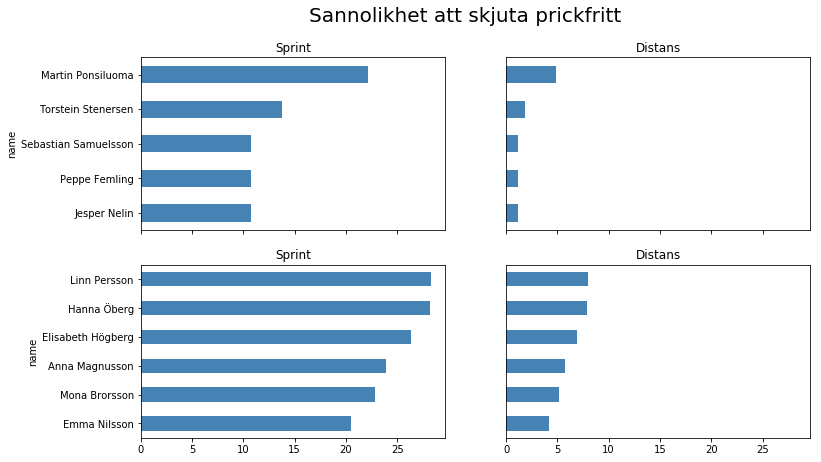

Chart url: https://www.dropbox.com/s/e6yw0wtposgc96i/Sannolikhet+att+skjuta+fullt.svg?dl=0
Table url: https://www.dropbox.com/s/e6yw0wtposgc96i/Sannolikhet+att+skjuta+fullt.xlsx?dl=0


Träffprocent  Antal lopp  nat    sex  \
name                                                         
Jesper Nelin                 80.00          11  swe    men   
Peppe Femling                80.00           9  swe    men   
Sebastian Samuelsson         80.00          13  swe    men   
Torstein Stenersen           82.00           8  swe    men   
Emma Nilsson                 85.33          10  swe  women   
Martin Ponsiluoma            86.00          10  swe    men   
Mona Brorsson                86.25          15  swe  women   
Anna Magnusson               86.67           7  swe  women   
Elisabeth Högberg            87.50           5  swe  women   
Hanna Öberg                  88.10          13  swe  women   
Linn Persson                 88.12          11  swe  women   

                      Sannolikhet att skjuta fullt i sprint  \
name                                                          
Jesper Nelin                                          10.74   
Peppe Femling                                         10.74   
Sebastian Samuelsson                                  10.74   
Torstein Stenersen                                    13.74   
Emma Nilsson                                          20.47   
Martin Ponsiluoma                                     22.13   
Mona Brorsson                                         22.78   
Anna Magnusson                                        23.91   
Elisabeth Högberg                                     26.31   
Hanna Öberg                                           28.15   
Linn Persson                                          28.25   

                      Sannolikhet att skjuta fullt i distanslopp  \
name                                                               
Jesper Nelin                                                1.15   
Peppe Femling                                               1.15   
Sebastian Samuelsson                                        1.15   
Torstein Stenersen                                          1.89   
Emma Nilsson                                                4.19   
Martin Ponsiluoma                                           4.90   
Mona Brorsson                                               5.19   
Anna Magnusson                                              5.72   
Elisabeth Högberg                                           6.92   
Hanna Öberg                                                 7.93   
Linn Persson                                                7.98   

                      Skjuter fullt i X:e sprintlopp  \
name                                                   
Jesper Nelin                                    9.31   
Peppe Femling                                   9.31   
Sebastian Samuelsson                            9.31   
Torstein Stenersen                              7.28   
Emma Nilsson                                    4.88   
Martin Ponsiluoma                               4.52   
Mona Brorsson                                   4.39   
Anna Magnusson                                  4.18   
Elisabeth Högberg                               3.80   
Hanna Öberg                                     3.55   
Linn Persson                                    3.54   

                      Skjuter fullt i X:e distanslopp  
name                                                   
Jesper Nelin                                    86.74  
Peppe Femling                                   86.74  
Sebastian Samuelsson                            86.74  
Torstein Stenersen                              52.93  
Emma Nilsson                                    23.86  
Martin Ponsiluoma                               20.42  
Mona Brorsson                                   19.27  
Anna Magnusson                                  17.50  
Elisabeth Högberg                               14.45  
Hanna Öberg                                     12.62  
Linn Persson                                    12.53

<Figure size 432x288 with 0 Axes>

In [31]:
from matplotlib.ticker import FuncFormatter
df_swe = runnner_df[(runnner_df.nat=="swe") & (runnner_df.n_races >= 5)].set_index("name").sort_values("shot_pct")
df_swe.index = df_swe.index.map(t)
#ax = df_swe.sort_values("shot_pct").groupby("sex").plot.barh(subplots=True, sharey=True)
#ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
#ax.set_title("")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,7), sharex=True)


#for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
#    grouped.get_group(key).plot(ax=ax)

#ax.legend()
#plt.show()
for i, (sex, by_sex_df) in enumerate(df_swe.groupby("sex")):
    by_sex_df["prob_sprint"].plot(kind="barh", ax=axes[i][0], color="steelblue").set_title("Sprint")
    by_sex_df["prob_distance"].plot(kind="barh", ax=axes[i][1], color="steelblue").set_title("Distans")
    axes[i][1].get_yaxis().set_visible(False)

plt.suptitle(u"Sannolikhet att skjuta prickfritt", size=20)
#fig.tight_layout()
plt.show()

export_table = df_swe.rename(columns={"shot_pct": u"Träffprocent",
                       "n_races": "Antal lopp",
                       "prob_sprint": u"Sannolikhet att skjuta fullt i sprint",
                       "prob_distance": u"Sannolikhet att skjuta fullt i distanslopp",
                       "ratio_sprint": u"Skjuter fullt i X:e sprintlopp",
                       "ratio_distance": u"Skjuter fullt i X:e distanslopp",
                      }).round(2)
save_chart("Sannolikhet att skjuta fullt", plt)
save_table("Sannolikhet att skjuta fullt", export_table)
export_table

In [35]:
print u"Träffprocent för svenska åkare"
print export_table[[u"Träffprocent", "Antal lopp"]].sort_values(u"Träffprocent", ascending=False).round(1)

Träffprocent för svenska åkare
                      Träffprocent  Antal lopp
name                                          
Linn Persson                  88.1          11
Hanna Öberg                   88.1          13
Elisabeth Högberg             87.5           5
Anna Magnusson                86.7           7
Mona Brorsson                 86.2          15
Martin Ponsiluoma             86.0          10
Emma Nilsson                  85.3          10
Torstein Stenersen            82.0           8
Jesper Nelin                  80.0          11
Peppe Femling                 80.0           9
Sebastian Samuelsson          80.0          13


In [36]:
print u"Sannolikhet att skjuta fullt"
print df_swe[[u"prob_sprint", "prob_distance"]].sort_values(u"prob_sprint", ascending=False)\
                                               .round(1)\
                                               .rename(columns={"prob_sprint": "Sprint", "prob_distance": "Distans"})

Sannolikhet att skjuta fullt
                      Sprint  Distans
name                                 
Linn Persson            28.2      8.0
Hanna Öberg             28.2      7.9
Elisabeth Högberg       26.3      6.9
Anna Magnusson          23.9      5.7
Mona Brorsson           22.8      5.2
Martin Ponsiluoma       22.1      4.9
Emma Nilsson            20.5      4.2
Torstein Stenersen      13.7      1.9
Jesper Nelin            10.7      1.2
Peppe Femling           10.7      1.2
Sebastian Samuelsson    10.7      1.2


In [39]:
print u"Löpare X skjuter full i vart N:te lopp"
print df_swe[[u"ratio_sprint", "ratio_distance"]].sort_values(u"ratio_sprint")\
                                               .round(0)\
                                               .rename(columns={"ratio_sprint": "Sprint", "ratio_distance": "Distans"})

Löpare X skjuter full i vart N:te lopp
                      Sprint  Distans
name                                 
Linn Persson             4.0     13.0
Hanna Öberg              4.0     13.0
Elisabeth Högberg        4.0     14.0
Anna Magnusson           4.0     17.0
Mona Brorsson            4.0     19.0
Martin Ponsiluoma        5.0     20.0
Emma Nilsson             5.0     24.0
Torstein Stenersen       7.0     53.0
Jesper Nelin             9.0     87.0
Peppe Femling            9.0     87.0
Sebastian Samuelsson     9.0     87.0


## Best shooters

In [40]:
best_shooters_df = runnner_df[runnner_df["n_races"] > 5]
best_shooters_df["rank"] = best_shooters_df.groupby(["sex"])["shot_pct"].rank(ascending=False)
best_shooters_df[best_shooters_df["rank"] <= 10].sort_values(["sex","rank"])

for sex, _df in best_shooters_df.sort_values("rank").groupby("sex"):
    print _df[["shot_pct", "n_races"]].head(10).round(1).rename(columns={"shot_pct": u"Träffprocent", "n_races": "Antal lopp"})

                         Träffprocent  Antal lopp
runner                                           
O. MORAVEC (cze)                 92.7          14
S. EDER (aut)                    92.1          18
A. TYSHCHENKO (ukr)              91.2           6
M. FOURCADE (fra)                91.2          15
C. GOW (can)                     90.4          15
A. PEIFFER (ger)                 90.0          16
Q. FILLON MAILLET (fra)          90.0          18
T. GRONMAN (fin)                 90.0           8
L.H. BIRKELAND (nor)             90.0          11
K. ANEV (bul)                    89.4          12
                      Träffprocent  Antal lopp
runner                                        
E. PAVLOVA (rus)              95.0           9
A. RUNGGALDIER (ita)          92.5          11
L. VITTOZZI (ita)             91.7          18
C. COLOMBO (fra)              91.0           7
V. VITKOVA (cze)              90.5          13
L. DAHLMEIER (ger)            90.0           8
C. RIEDER (aut)         

/home/jens/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Hur sannolikt 

In [41]:
# The following skiers are better than Hanna Öberg on average
better_skiers = [u'A. KUZMINA (svk)', u'M.O. ROEISELAND (nor)', u'K. MAKARAINEN (fin)',
       u'D. HERRMANN (ger)', u'D. WIERER (ita)', u'T. ECKHOFF (nor)',
       u'P. FIALKOVA (svk)', u'L. VITTOZZI (ita)']

df_better_skiers = runnner_df[runnner_df.index.isin(better_skiers)]
print df_better_skiers[["shot_pct"]].round().rename(columns={"shot_pct": u"Träffprocent",
                       "prob_sprint": u"Sannolikhet i sprint",
                       "prob_distance": u"Sannolikhet i distans",
                      })

                       Träffprocent
runner                             
A. KUZMINA (svk)               81.0
D. HERRMANN (ger)              77.0
D. WIERER (ita)                87.0
K. MAKARAINEN (fin)            80.0
L. VITTOZZI (ita)              92.0
M.O. ROEISELAND (nor)          85.0
P. FIALKOVA (svk)              85.0
T. ECKHOFF (nor)               74.0


In [56]:
(df_better_skiers.shot_pct / 100).round(3).tolist()

[0.819, 0.753, 0.872, 0.797, 0.917, 0.853, 0.856, 0.727]

In [44]:
s_sprint = 1 - df_better_skiers["prob_sprint"] / 100
s_dist = 1 - df_better_skiers["prob_distance"] / 100

prob_sprint = 100 - reduce(lambda x, y: x*y, s_sprint) * 100
prob_dist = 100 - reduce(lambda x, y: x*y, s_dist) * 100

print "Sannolikheten att minst en bättre åkare skjuter fullt i sprintlopp: ", round(prob_sprint)
print "Sannolikheten att minst en bättre åkare skjuter fullt i distanslopp: ", round(prob_dist)

Sannolikheten att minst en bättre åkare skjuter fullt i sprintlopp:  81.0
Sannolikheten att minst en bättre åkare skjuter fullt i distanslopp:  32.0


In [62]:
better_skiers = [u'J.T. BOE (nor)', u'S. DESTHIEUX (fra)', u'J. EBERHARD (aut)',
       u'B. DOLL (ger)', u'A. LOGINOV (rus)', u'M. FOURCADE (fra)',
       u'T. BOE (nor)', u'L. HOFER (ita)', u'A. PEIFFER (ger)',
       u'Q. FILLON MAILLET (fra)', u'A. GUIGONNAT (fra)',
       u'E. BJOENTEGAARD (nor)', u"L'ABEE-LUND HENRIK (nor)",
       u'B. WEGER (sui)', u'J. KUEHN (ger)', u'S. EDER (aut)', u'J. FAK (slo)',
       u'D. WINDISCH (ita)', u'V.S. CHRISTIANSEN (nor)',
       u'E. GARANICHEV (rus)', u'A. RASTORGUJEVS (lat)']

df_better_skiers = runnner_df[runnner_df.index.isin(better_skiers)]
print df_better_skiers[["shot_pct"]].round().rename(columns={"shot_pct": u"Träffprocent",
                       "prob_sprint": u"Sannolikhet i sprint",
                       "prob_distance": u"Sannolikhet i distans",
                      })

                          Träffprocent
runner                                
A. GUIGONNAT (fra)                85.0
A. LOGINOV (rus)                  86.0
A. PEIFFER (ger)                  89.0
A. RASTORGUJEVS (lat)             83.0
B. DOLL (ger)                     79.0
B. WEGER (sui)                    88.0
D. WINDISCH (ita)                 78.0
E. BJOENTEGAARD (nor)             79.0
E. GARANICHEV (rus)               88.0
J. EBERHARD (aut)                 79.0
J. FAK (slo)                      86.0
J. KUEHN (ger)                    75.0
J.T. BOE (nor)                    87.0
L'ABEE-LUND HENRIK (nor)          81.0
L. HOFER (ita)                    83.0
M. FOURCADE (fra)                 91.0
Q. FILLON MAILLET (fra)           89.0
S. DESTHIEUX (fra)                86.0
S. EDER (aut)                     92.0
T. BOE (nor)                      86.0
V.S. CHRISTIANSEN (nor)           86.0


In [48]:
s_sprint = 1 - df_better_skiers["prob_sprint"] / 100
s_dist = 1 - df_better_skiers["prob_distance"] / 100

prob_sprint = 100 - reduce(lambda x, y: x*y, s_sprint) * 100
prob_dist = 100 - reduce(lambda x, y: x*y, s_dist) * 100

print "Sannolikheten att minst en bättre åkare skjuter fullt i sprintlopp: ", round(prob_sprint,1)
print "Sannolikheten att minst en bättre åkare skjuter fullt i distanslopp: ", round(prob_dist,1)

Sannolikheten att minst en bättre åkare skjuter fullt i sprintlopp:  99.4
Sannolikheten att minst en bättre åkare skjuter fullt i distanslopp:  70.1


In [63]:
(df_better_skiers.shot_pct / 100).round(3).tolist()

[0.847,
 0.864,
 0.894,
 0.827,
 0.794,
 0.878,
 0.783,
 0.794,
 0.879,
 0.792,
 0.861,
 0.75,
 0.867,
 0.806,
 0.831,
 0.91,
 0.892,
 0.861,
 0.922,
 0.857,
 0.856]

In [69]:
(pd.Series([0.00657, 0.01020, 0.01240]) * 100).round(1).sum()

2.9